# WeatherPy

---

## Generates Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt                                         # Assists with charting.
import pandas as pd                                                     # Assists with working with DataFrames.
import numpy as np                                                      # Helps generate an array of random numbers.
import requests                                                         # Helps requests data from the API's used.
import time                                                             # Assists with timed responses.
from scipy.stats import linregress                                      # Assists with linear regression.
import json                                                             # Imports json format. 

# Imports the OpenWeatherMap API key
from api_keys import weather_api_key                                    # Api Key stored in annonymous file due to key sensitivity. 

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy                                               # Python library storing cities and their lat/lon coordinates. 

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations that we will randonly generate.
lat_lngs = []

# Empty list for holding the cities names that will be collected from citipy.
cities = []

# Range of latitudes and longitudes.
lat_range = (-90, 90)
lng_range = (-180, 180)


# Creates a set of random lat and lng combinations.

# 'uniform' is used to return a random floating-point number that is greater than or equal to the specified low boundary, 
# and less than or equal to the specified high boundary.

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)                                      # zips both arrays created for lats/ lngs together. 

# Identify nearest city for each lat, lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# First the json's format that will be worked with will be printed for ability to follow along with the next code block:

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with each city
city_url = url+ "appid=" + weather_api_key + "&q=" + "guiuan"

city_weather = requests.get(city_url).json()
print(json.dumps(city_weather, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 11.0333,
        "lon": 125.7247
    },
    "dt": 1685797409,
    "id": 1712206,
    "main": {
        "feels_like": 307.05,
        "grnd_level": 1009,
        "humidity": 71,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 302.58,
        "temp_max": 302.58,
        "temp_min": 302.58
    },
    "name": "Guiuan",
    "rain": {
        "1h": 0.35
    },
    "sys": {
        "country": "PH",
        "sunrise": 1685740401,
        "sunset": 1685786235
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 223,
        "gust": 0.87,
        "speed": 0.74
    }
}


In [12]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):                                    # if the record index is 0 or if index > 50, start new set.
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+ "appid=" + weather_api_key + "&q=" + city
    #city_url = f"{url}appid={weather_api_key}&q={city}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | lebu
Processing Record 7 of Set 1 | afaahiti
Processing Record 8 of Set 1 | nurota
Processing Record 9 of Set 1 | nyurba
Processing Record 10 of Set 1 | tomatlan
Processing Record 11 of Set 1 | port mathurin
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | papao
Processing Record 14 of Set 1 | luau
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | quellon
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | ibateguara
Processing Record 19 of Set 1 | fale old settlement
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | vorg

Processing Record 38 of Set 4 | sengkang
Processing Record 39 of Set 4 | stanley
Processing Record 40 of Set 4 | remire-montjoly
Processing Record 41 of Set 4 | san andres
Processing Record 42 of Set 4 | bukoba
Processing Record 43 of Set 4 | taltal
Processing Record 44 of Set 4 | strzelce krajenskie
Processing Record 45 of Set 4 | bethanie
Processing Record 46 of Set 4 | lepsy
Processing Record 47 of Set 4 | polyarnyy
Processing Record 48 of Set 4 | bam
Processing Record 49 of Set 4 | svetlyy
Processing Record 0 of Set 5 | conde
Processing Record 1 of Set 5 | ambon
Processing Record 2 of Set 5 | sorong
Processing Record 3 of Set 5 | crane
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | amungan
Processing Record 6 of Set 5 | alofi
Processing Record 7 of Set 5 | la mira
Processing Record 8 of Set 5 | nikel
Processing Record 9 of Set 5 | lihue
Processing Record 10 of Set 5 | tazovsky
Processing Record 11 of Set 5 | varpalota
Processing Record 12 of Set 5 | hi

Processing Record 33 of Set 8 | kilindoni
Processing Record 34 of Set 8 | chiredzi
Processing Record 35 of Set 8 | oranjemund
Processing Record 36 of Set 8 | nouadhibou
Processing Record 37 of Set 8 | pangoa
Processing Record 38 of Set 8 | balqash
Processing Record 39 of Set 8 | oriximina
Processing Record 40 of Set 8 | sisimiut
Processing Record 41 of Set 8 | puerto aysen
Processing Record 42 of Set 8 | suoyarvi
Processing Record 43 of Set 8 | les avirons
Processing Record 44 of Set 8 | teguise
Processing Record 45 of Set 8 | semnan
Processing Record 46 of Set 8 | ishikawa
Processing Record 47 of Set 8 | bemidji
Processing Record 48 of Set 8 | oak grove
Processing Record 49 of Set 8 | san luis de la loma
Processing Record 0 of Set 9 | upata
Processing Record 1 of Set 9 | muisne
Processing Record 2 of Set 9 | celestun
Processing Record 3 of Set 9 | sambava
Processing Record 4 of Set 9 | mukalla
Processing Record 5 of Set 9 | dalandzadgad
Processing Record 6 of Set 9 | bovalino
Processi

Processing Record 18 of Set 12 | jiazi
Processing Record 19 of Set 12 | sao joao da barra
Processing Record 20 of Set 12 | zagora
Processing Record 21 of Set 12 | machico
Processing Record 22 of Set 12 | justo daract
Processing Record 23 of Set 12 | antsiranana
Processing Record 24 of Set 12 | coronel suarez
Processing Record 25 of Set 12 | anibare
City not found. Skipping...
Processing Record 26 of Set 12 | severo-yeniseyskiy
Processing Record 27 of Set 12 | mugia
Processing Record 28 of Set 12 | quechultenango
Processing Record 29 of Set 12 | kakata
Processing Record 30 of Set 12 | geraldton
Processing Record 31 of Set 12 | hajin
Processing Record 32 of Set 12 | turkmenbasy
Processing Record 33 of Set 12 | champerico
Processing Record 34 of Set 12 | santa elena de uairen
Processing Record 35 of Set 12 | ancud
Processing Record 36 of Set 12 | bolivar
Processing Record 37 of Set 12 | guaruja
Processing Record 38 of Set 12 | saimbeyli
Processing Record 39 of Set 12 | tromso
Processing R

In [16]:
# Convert the cities weather data into a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Show Record Count.
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [17]:
# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,284.36,61,12,9.01,NZ,1685797413
1,puerto ayora,-0.7393,-90.3518,299.01,94,72,2.68,EC,1685797413
2,edinburgh of the seven seas,-37.0676,-12.3116,287.19,66,100,1.74,SH,1685797413
3,san patricio,28.0170,-97.5169,301.09,78,94,2.78,US,1685797413
4,alice springs,-23.7000,133.8833,293.90,30,40,4.12,AU,1685797413


In [18]:
# Export the City_Data into a csv.
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data.
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,284.36,61,12,9.01,NZ,1685797413
1,puerto ayora,-0.7393,-90.3518,299.01,94,72,2.68,EC,1685797413
2,edinburgh of the seven seas,-37.0676,-12.3116,287.19,66,100,1.74,SH,1685797413
3,san patricio,28.0170,-97.5169,301.09,78,94,2.78,US,1685797413
4,alice springs,-23.7000,133.8833,293.90,30,40,4.12,AU,1685797413


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

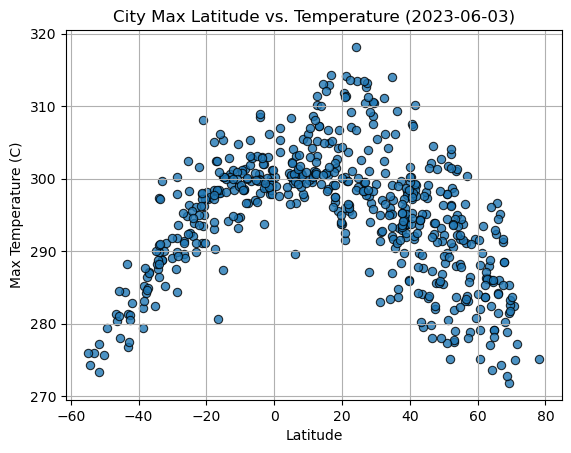

In [62]:
# Build scatter plot for latitude vs. temperature.
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, alpha=0.8, edgecolor="black", linewidth=0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-06-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

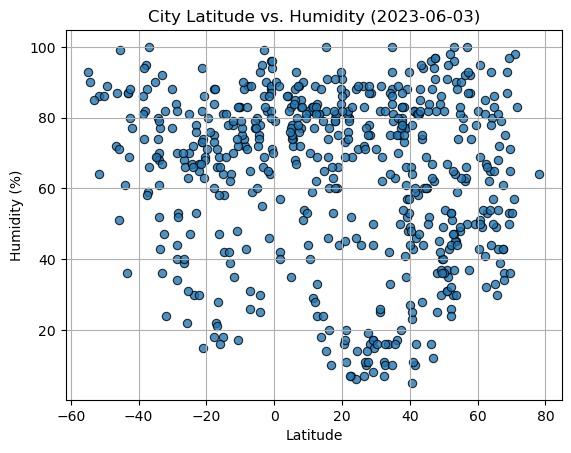

In [64]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("int")
plt.scatter(x_values, y_values, alpha=0.8, edgecolor="black", linewidth=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-06-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

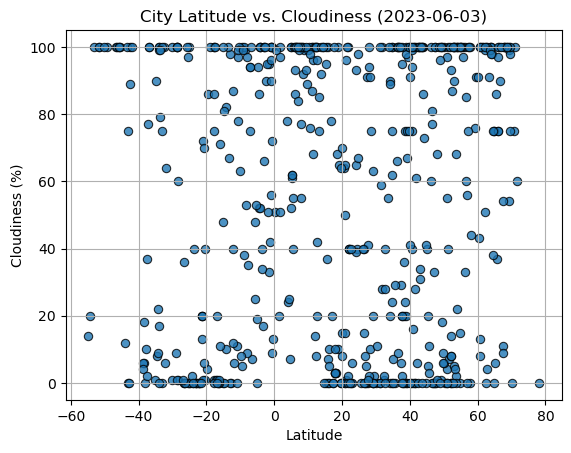

In [66]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("int")
plt.scatter(x_values, y_values, alpha=0.8, edgecolor="black", linewidth=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-06-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

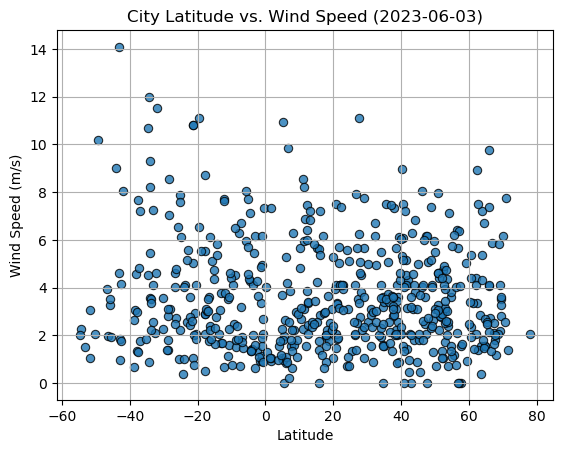

In [69]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values, y_values, alpha=0.8, edgecolor="black", linewidth=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-06-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


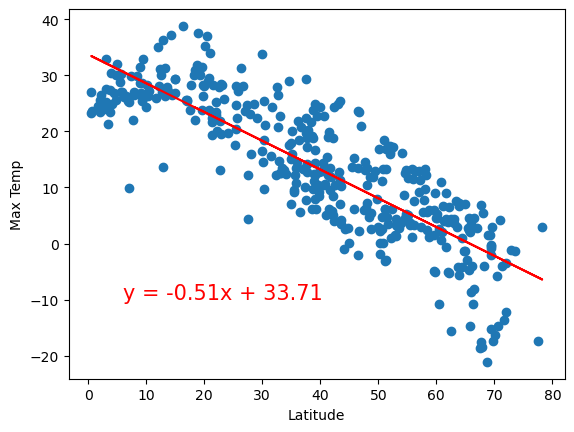

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


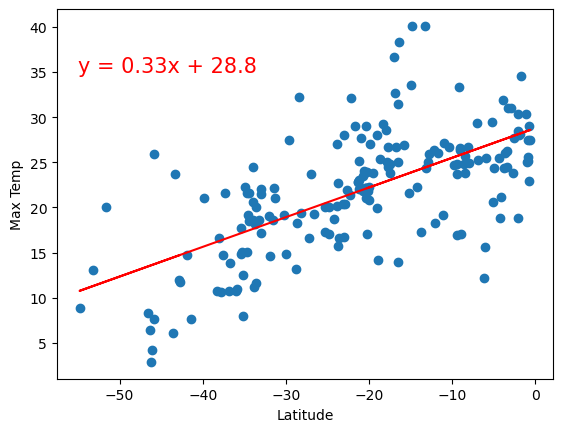

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


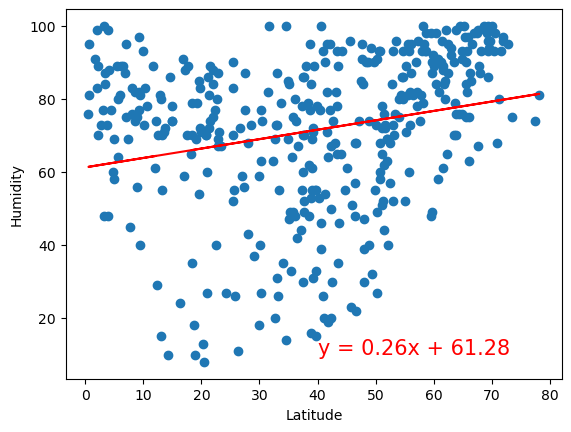

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


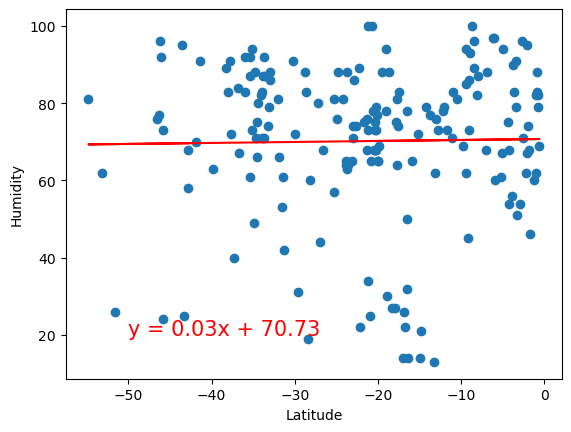

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


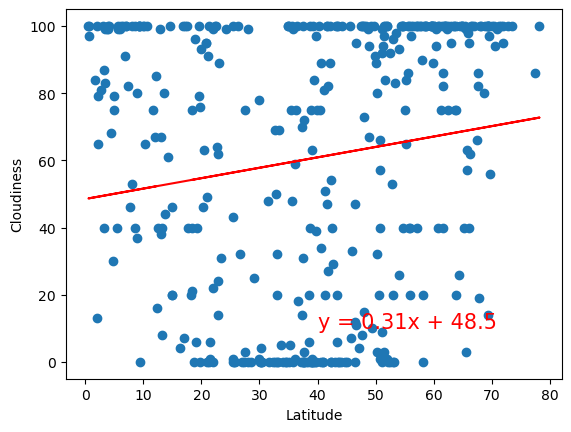

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


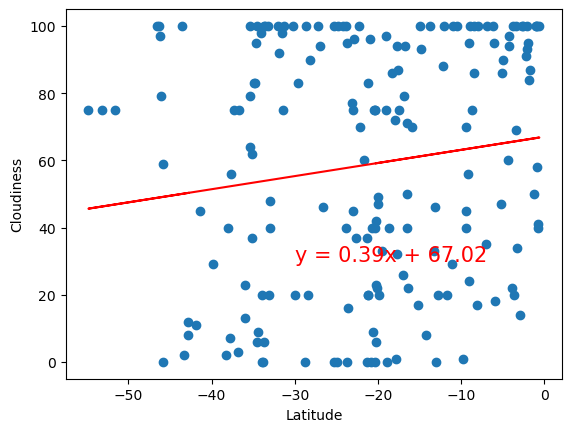

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


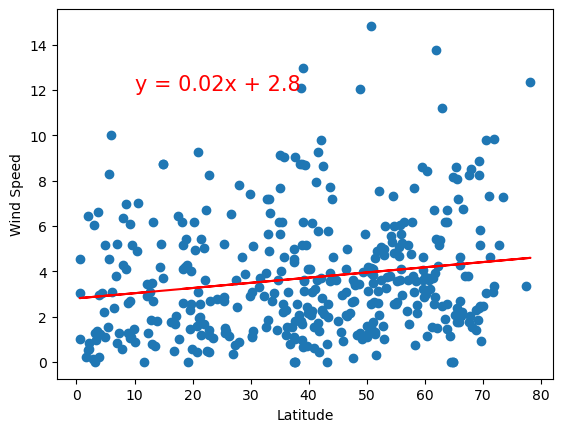

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


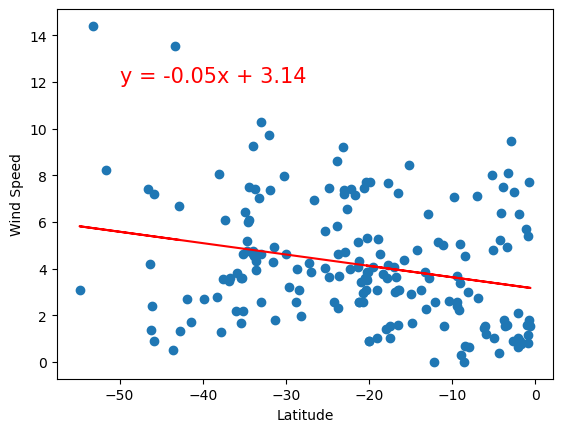

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE